# **Energy Supply and Renewable Electricity Production**

#**Some of the questions answered in this project:**

*    What is the average `GDP` over the last `10 years` for each country?
*    What `country` has the maximum `% Renewable` and what is the percentage?
*    What is the ratio of `Self-Citations` to `Total Citations`?
*    What `country` has the highest ratio?
*    What's the correlation between `Energy Supply per capita` and last `5 year` GDP?

#**Objectives:**

*    Data Transformation
*    Data Cleansing
*    Exploratory data analysis (EDA)

#**Tech Stacks:**

*    Python
*    Pandas Library
*    Numpy Library

#**Datasets:**

*    `Energy Indicators.xls`
*    `scimagojr-3.xlsx`
*    `world_bank.csv`

***To download the datasets make sure to check the `datasets` folder in the `repository`***






In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

###**Reading `Energy Indicators.xls` dataset**

In [ ]:
data = pd.read_excel('Energy Indicators.xls')

In [ ]:
data.head() #Reading the data

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,Environmental Indicators: Energy,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,Energy Supply and Renewable Electricity Produc...,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,Last update: December 2015


##**Handling unneeded columns/rows and renaming columns**

In [ ]:
Energy = data.copy()

In [ ]:
Energy.drop(['Unnamed: 0','Unnamed: 1'], axis=1, inplace=True)

In [ ]:
Energy.drop(index=Energy.index[:17], axis=0, inplace=True)

In [ ]:
Energy.rename(columns = {'Unnamed: 2': 'Country','Unnamed: 3':'Energy Supply','Unnamed: 4':'Energy Supply per capita','Unnamed: 5':'% Renewable'}, inplace=True)

In [ ]:
Energy.drop(index=Energy.tail(38).index, axis=0, inplace=True)

In [ ]:
Energy #Validating the final result

,Country,Energy Supply,Energy Supply per capita,% Renewable
17,Afghanistan,321,10,78.66928
18,Albania,102,35,100
19,Algeria,1959,51,0.55101
20,American Samoa,...,...,0.641026
21,Andorra,9,121,88.69565
...,...,...,...,...
239,Viet Nam,2554,28,45.32152
240,Wallis and Futuna Islands,0,26,0
241,Yemen,344,13,0
242,Zambia,400,26,99.71467


## **Converting `Energy Supply` From *petajoule*  to *gigajoules***

In [ ]:
Energy['Energy Supply'] = Energy['Energy Supply'].apply(lambda x:x*1000000)

In [ ]:
Energy.Country = Energy.Country.str.replace('\d+', '') #Removing numeric values next to Country's name

In [ ]:
Energy.set_index('Country', inplace=True)

In [ ]:
#Smoothening Country Names
Energy.rename(index={"Republic of Korea": "South Korea",
                   "United States of America": "United States",
                   "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
                   "China, Hong Kong Special Administrative Region": "Hong Kong",
                   "Bolivia (Plurinational State of)":"Bolivia",
                   "Switzerland17":"Switzerland",
                 "Falkland Islands (Malvinas)":"Falkland Islands",
                 "Iran (Islamic Republic of)":"Iran",
                 "Micronesia (Federated States of)":"Micronesia",
                 "Sint Maarten (Dutch part)":"Sint Maarten",
                 "Venezuela (Bolivarian Republic of)":"Venezuela"}, inplace=True)

In [ ]:
Energy.reset_index(inplace=True)

In [ ]:
Energy.head() #Validating the changes

,Country,Energy Supply,Energy Supply per capita,% Renewable
0,Afghanistan,321000000,10,78.66928
1,Albania,102000000,35,100
2,Algeria,1959000000,51,0.55101
3,American Samoa,.................................................,...,0.641026
4,Andorra,9000000,121,88.69565


##**Importing another dataset `world_bank.csv`**

In [ ]:
data_2 = pd.read_csv('world_bank.csv', header=None)
GDP = data_2.copy()

##**Handling Column names and unwanted rows**

In [ ]:
GDP.drop(index=GDP.index[:4], inplace=True)

In [ ]:
GDP.columns = GDP.iloc[0] #Choosing first row to become table's columns

In [ ]:
GDP.drop(index=GDP.index[0], inplace=True) #Dropping the row that became table's columns

In [ ]:
GDP.head() #Validating the results

4,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0
5,Aruba,ABW,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN
6,Andorra,AND,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.018196e+09,4.021331e+09,3.675728e+09,3.535389e+09,3.346317e+09,3.185605e+09,3.129538e+09,3.127550e+09,NaN,NaN
7,Afghanistan,AFG,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.030523e+10,1.172119e+10,1.214448e+10,1.469733e+10,1.593680e+10,1.691113e+10,1.935220e+10,1.973134e+10,1.999032e+10,2.029415e+10
8,Angola,AGO,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,5.581103e+10,6.842044e+10,7.787420e+10,7.975320e+10,8.247091e+10,8.570262e+10,9.012096e+10,9.626143e+10,1.008863e+11,1.039106e+11
9,Albania,ALB,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,9.771760e+09,1.034829e+10,1.112752e+10,1.150029e+10,1.192695e+10,1.223109e+10,1.240477e+10,1.254247e+10,1.279331e+10,1.312082e+10


##**Replacing the names of the following countries**
`"Korea, Rep.": "South Korea", "Iran, Islamic Rep.": "Iran", "Hong Kong SAR, China": "Hong Kong"`

In [ ]:
GDP.rename(columns={'Country Name':'Country'}, inplace=True) #Renaming column country name to country to match Energy DataFrame
GDP.set_index('Country', inplace=True)
GDP.rename(index={"Korea, Rep.": "South Korea",
                 "Iran, Islamic Rep.": "Iran",
                 "Hong Kong SAR, China": "Hong Kong"}, inplace=True)

In [ ]:
GDP.reset_index(inplace=True)

In [ ]:
GDP['Country'].iloc[123] #Validating the changes

'South Korea'

##**Importing another dataset `scimagojr-3.xlsx`**

In [ ]:
data_3 = pd.read_excel('scimagojr-3.xlsx')
ScimEn = data_3.copy()

In [ ]:
ScimEn.head()

,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,1,China,127050,126767,597237,411683,4.70,138
1,2,United States,96661,94747,792274,265436,8.20,230
2,3,Japan,30504,30287,223024,61554,7.31,134
3,4,United Kingdom,20944,20357,206091,37874,9.84,139
4,5,Russian Federation,18534,18301,34266,12422,1.85,57


##**Merging the 3 datasets together on join key `Country`**

In [ ]:
Merged = pd.merge(pd.merge(Energy,
                           GDP[['Country',2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0]], on = 'Country'),
                  ScimEn.where(ScimEn['Rank'] <= 15), on = 'Country')

In [ ]:
Merged.set_index('Country', inplace=True) #Setting an index using the Country column

In [ ]:
Merged.shape #Validating the right number of columns and rows

(15, 20)

In [ ]:
Merged.describe() #Descriptive Statistical Summary

,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
count,1.500000e+01,1.500000e+01,1.500000e+01,1.500000e+01,1.500000e+01,1.500000e+01,1.500000e+01,1.500000e+01,1.500000e+01,1.400000e+01,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,2.978152e+12,3.095871e+12,3.141171e+12,3.085834e+12,3.219173e+12,3.313404e+12,3.391038e+12,3.470126e+12,3.562304e+12,3.875826e+12,8.000000,27703.133333,27394.066667,201776.933333,69698.800000,8.484667,119.466667
std,3.525351e+12,3.589045e+12,3.580506e+12,3.492797e+12,3.602331e+12,3.677913e+12,3.788807e+12,3.876953e+12,3.996887e+12,4.185453e+12,4.472136,35131.532962,34859.707837,210915.794366,113291.694884,2.815531,39.631998
min,3.895523e+11,4.250646e+11,4.289909e+11,4.389208e+11,4.677902e+11,4.853309e+11,4.532569e+11,4.445926e+11,4.639027e+11,1.266580e+12,1.000000,8668.000000,8596.000000,34266.000000,12422.000000,1.850000,57.000000
25%,1.325843e+12,1.421505e+12,1.456445e+12,1.445337e+12,1.478295e+12,1.503649e+12,1.513046e+12,1.512037e+12,1.527157e+12,1.660264e+12,4.500000,10196.000000,10062.000000,101307.500000,20860.000000,7.155000,105.000000
50%,1.845080e+12,1.957118e+12,2.056809e+12,2.054215e+12,2.125185e+12,2.137439e+12,2.077184e+12,2.051982e+12,2.200617e+12,2.343315e+12,8.000000,15005.000000,14841.000000,128763.000000,27426.000000,8.580000,115.000000
75%,2.970365e+12,3.055492e+12,3.076723e+12,2.939653e+12,3.032146e+12,3.122201e+12,3.131846e+12,3.144942e+12,3.177009e+12,3.454463e+12,11.500000,19739.000000,19329.000000,210547.000000,39402.000000,10.065000,136.000000
max,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13,15.000000,127050.000000,126767.000000,792274.000000,411683.000000,13.080000,230.000000


In [ ]:
Merged['Energy Supply per capita'] = Merged['Energy Supply per capita'].apply(pd.to_numeric) #Converting Energy Supply per capita column to int

##**Figuring out the correlation between `Energy Supply per capita` vs `2010, 2011, 2012, 2013, 2014, 2015 GDPs` and `Rank`**

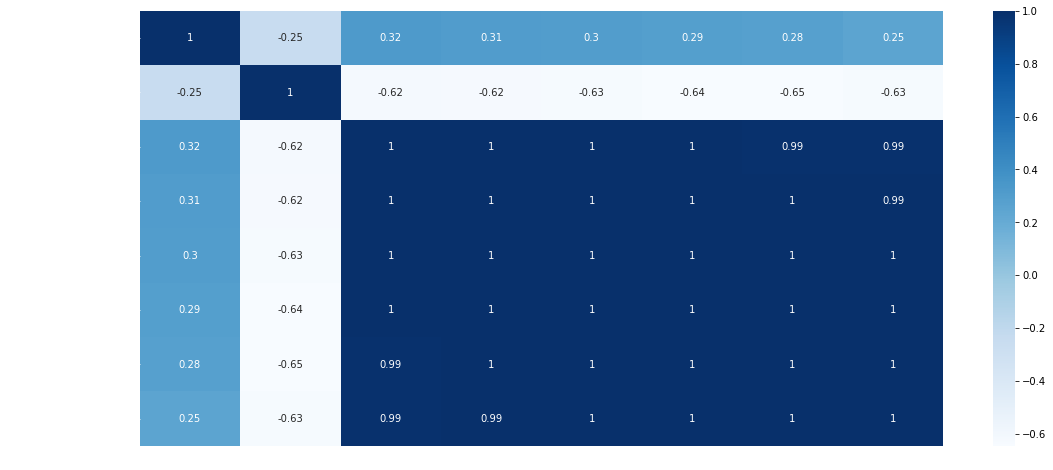

In [ ]:
plt.figure(figsize=(18,8))
sns.heatmap(data= Merged[['Energy Supply per capita','Rank',2010.0,2011,2012.0,2013.0,2014.0,2015.0]].corr(), annot=True, cmap='Blues')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')

**The correlation between `Energy Supply per capita` and the other features is somewhat moderate.**

##**Figuring out the number of entries that got cut off in case on `inner join` without the above conditions**

In [ ]:
Outer_Merging = pd.merge(pd.merge(Energy, GDP, on='Country', how='outer'),
                           ScimEn, on= 'Country', how='outer', indicator=True) #Joing the data through Outer Join
Inner_Merging = pd.merge(pd.merge(Energy, GDP, on='Country'),
                         ScimEn, on='Country')

In [ ]:
len(Outer_Merging)-len(Inner_Merging) 

158

##**What is the average GDP over the last 10 years for each country?**
*Excluding Duplicates*

In [ ]:
GDP_Copy = Merged[[2015.0,2014.0,2013.0,2012.0,2011.0,2010.0,2009.0,2008.0,2007.0,2006.0]].dropna().copy() #Taking a copy of the past 10 years and Country columns

In [ ]:
avgGDP = GDP_Copy[[2015.0,2014.0,2013.0,2012.0,2011.0,2010.0,2009.0,2008.0,2007.0,2006.0]].apply(np.mean, axis=1).sort_values(ascending= False)

In [ ]:
avgGDP #Retrieving the values

Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
dtype: float64

##**What is the mean** `Energy Supply per Capita`**?**

In [ ]:
Merged['Energy Supply per capita'].mean()

157.6

##**What country has the maximum `% Renewable` and what is the percentage?**

In [ ]:
Max_Renewable = Merged[['% Renewable']]

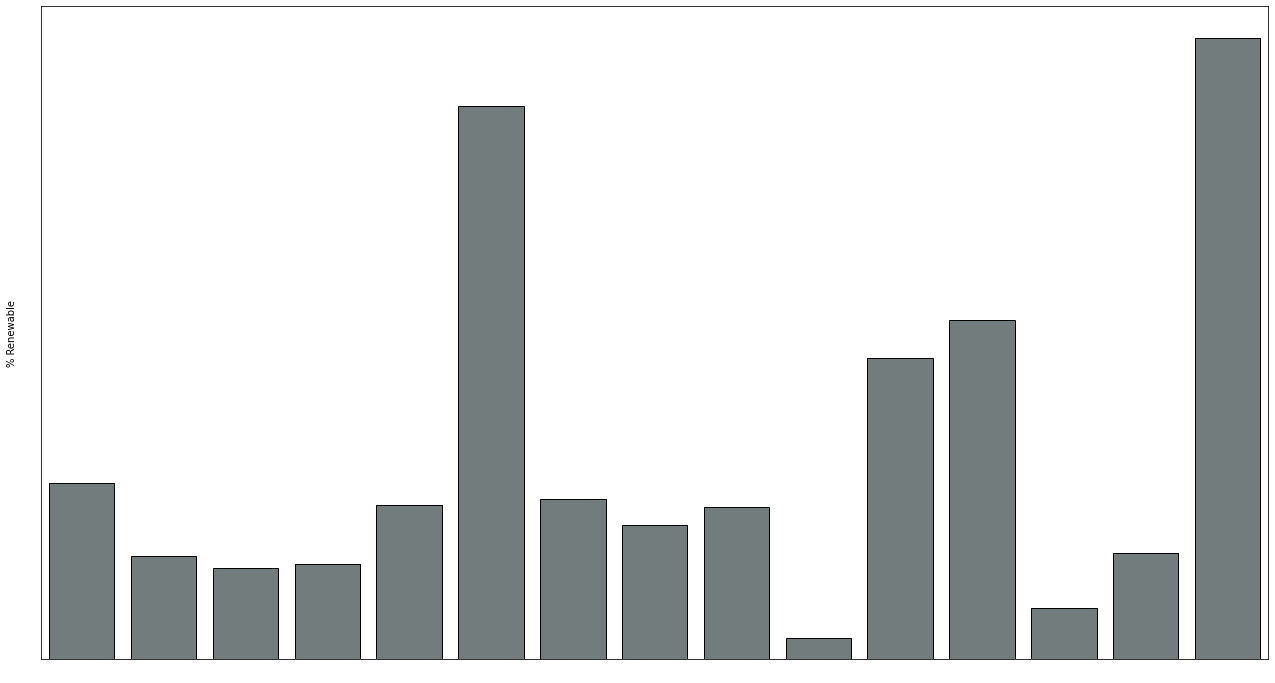

In [ ]:
#Visualizing the result
plt.figure(figsize=(22,12))
x = ['China','United States','Japan','United Kingdom','Russian Federation','Canada','Germany','India','France','South Korea',
     'Italy','Spain','Iran','Australia','Brazil']
y = Max_Renewable['% Renewable'].head(15)
sns.barplot(x= x, y= y, color='#717D7E', edgecolor='black')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')

In [ ]:
Max_Renewable.sort_values(by='% Renewable', ascending=False).iloc[0] #Sorting DESC and Slicing the first column

% Renewable    69.64803
Name: Brazil, dtype: object

####***Finding out what is the ratio of `Self-Citations` to `Total Citations`?***
####***and What is the maximum ratio and what country has the* *highest ratio?***

In [ ]:
Merged['Citation Rate'] = Merged['Self-citations']/Merged['Citations'] #Finding the Ratio between Self-Citations and Citations

In [ ]:
Citation_Rate_Copy = Merged[['Citation Rate']].sort_values(by='Citation Rate',ascending=False).copy() #Taking a copy of DESC sorted Citation Rate values

In [ ]:
Citation_Rate_Copy.reset_index()

,Country,Citation Rate
0,China,0.689313
1,Russian Federation,0.362517
2,United States,0.335031
3,Iran,0.332782
4,India,0.288973
5,Japan,0.275997
6,Italy,0.238364
7,Brazil,0.237159
8,France,0.218943
9,South Korea,0.197035


In [ ]:
Citation_Rate_Copy.iloc[0] #Highest Ratio

Citation Rate    0.689313
Name: China, dtype: float64

####**Assigning `1` if the country's `% Renewable` value is at or above the median for all countries in the top 15, and a `0` if the country's `% Renewable value` is below the median.**

In [ ]:
Merged['% Renewable Segments'] = np.NaN #Creating a new empty column

In [ ]:
Merged['% Renewable Segments'] = (Merged['% Renewable'].gt(Merged['% Renewable'].median())).astype(int) #Appending 1 and 0 based on the median of % Renewable

In [ ]:
Merged.sort_values(by= 'Rank', ascending=True, inplace=True)

In [ ]:
HighRenew = Merged[['% Renewable','% Renewable Segments']] #Taking a copy of Country, % Renewable and % Renwable Segments columns

In [ ]:
HighRenew.head() #Validating the answer

,% Renewable,% Renewable Segments
Country,,
China,19.75491,1
United States,11.57098,0
Japan,10.23282,0
United Kingdom,10.60047,0
Russian Federation,17.28868,1


####**Creating a new dataframe that contains the `Continents, Sample size, sum, mean` and `std` of estimated population of each country**

In [ ]:
Merged['Population'] = Merged['Energy Supply']/Merged['Energy Supply per capita'] #Calculating the population

In [ ]:
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}

Merged['Continent'] = pd.Series(ContinentDict) #Assigning each continent to each country in the table

In [ ]:
Merged.head() #Validating the changes

,Energy Supply,Energy Supply per capita,% Renewable,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,...,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Citation Rate,% Renewable Segments,Population,Continent
Country,,,,,,,,,,,,,,,,,,,,,
China,127191000000,93,19.75491,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,...,127050.0,126767.0,597237.0,411683.0,4.70,138.0,0.689313,1,1367645161.290323,Asia
United States,90838000000,286,11.57098,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,...,96661.0,94747.0,792274.0,265436.0,8.20,230.0,0.335031,0,317615384.615385,North America
Japan,18984000000,149,10.23282,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,...,30504.0,30287.0,223024.0,61554.0,7.31,134.0,0.275997,0,127409395.973154,Asia
United Kingdom,7920000000,124,10.60047,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,...,20944.0,20357.0,206091.0,37874.0,9.84,139.0,0.183773,0,63870967.741935,Europe
Russian Federation,30709000000,214,17.28868,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,...,18534.0,18301.0,34266.0,12422.0,1.85,57.0,0.362517,1,143500000.0,Europe


In [ ]:
Merged.set_index('Continent')

,Energy Supply,Energy Supply per capita,% Renewable,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,...,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Citation Rate,% Renewable Segments,Population
Continent,,,,,,,,,,,,,,,,,,,,,
Asia,127191000000,93,19.75491,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,...,1.0,127050.0,126767.0,597237.0,411683.0,4.70,138.0,0.689313,1,1367645161.290323
North America,90838000000,286,11.57098,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,...,2.0,96661.0,94747.0,792274.0,265436.0,8.20,230.0,0.335031,0,317615384.615385
Asia,18984000000,149,10.23282,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,...,3.0,30504.0,30287.0,223024.0,61554.0,7.31,134.0,0.275997,0,127409395.973154
Europe,7920000000,124,10.60047,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,...,4.0,20944.0,20357.0,206091.0,37874.0,9.84,139.0,0.183773,0,63870967.741935
Europe,30709000000,214,17.28868,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,...,5.0,18534.0,18301.0,34266.0,12422.0,1.85,57.0,0.362517,1,143500000.0
North America,10431000000,296,61.94543,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,...,6.0,17899.0,17620.0,215003.0,40930.0,12.01,149.0,0.190369,1,35239864.864865
Europe,13261000000,165,17.90153,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,...,7.0,17027.0,16831.0,140566.0,27426.0,8.26,126.0,0.195111,1,80369696.969697
Asia,33195000000,26,14.96908,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,...,8.0,15005.0,14841.0,128763.0,37209.0,8.58,115.0,0.288973,0,1276730769.230769
Europe,10597000000,166,17.02028,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,...,9.0,13153.0,12973.0,130632.0,28601.0,9.93,114.0,0.218943,0,63837349.39759


In [ ]:
Continent = Merged.reset_index().groupby('Continent')['Population'].agg([np.size,np.mean,np.std]) #Grouping the data based on the continent and running aggregations on the newly calculated Population column

In [ ]:
Continent.head() #Validating the result

,size,mean,std
Continent,,,
Asia,5,5.797333e+08,6.790979e+08
Australia,1,2.331602e+07,NaN
Europe,6,7.632161e+07,3.464767e+07
North America,2,1.764276e+08,1.996696e+08
South America,1,2.059153e+08,NaN




---



#🔗**Get In Touch**

### [**Email**](mailto:mustafaa7med@gmail.com)
### [**Linkedin**](https://www.linkedin.com/in/mustafaa7med)